# Task-1 : Zomato DataSet Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("zomato.csv")

In [2]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [3]:
# df = df_raw.copy()
# df.column = df.iloc[0]   # set first row as header
# df = df[1:]              # remove header row from data
# df.reset_index(drop=True, inplace=True)

In [4]:
# df.head()

In [5]:
rows,cols = df.shape
print("Number of rows: ",rows)
print("Number of columns:",cols)

Number of rows:  56252
Number of columns: 13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 2.8

Handle hidden missing value

# Data Cleaning:

In [7]:
obj_cols = df.select_dtypes(include='object').columns
for col in obj_cols:
    df.loc[df[col].astype(str).str.strip() == '', col] = np.nan   

In [33]:
for col in obj_cols:
    df[col].fillna(df[col].mode()[0])

In [9]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Rating Cleaning & Analysis:

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', ...,
       " but we weren't blown away. It was",
       " also a slightly larger portion size wud be much appreciated...\\n\\nService - 5/10\\n\\nReally needs a lot of tweak up... the waiters are never to be found on the floor... they lack knowledge of dishes... very uninviting overall...\\n\\nOverall not a grt experience :(')",
       ' small place '], shape=(2876,), dtype=object)

In [11]:
df[df['rate'].str.contains('[a-zA-z]', na=False)]['rate'].unique()

array(['\\nTop floor', " ('Rated 1.0'", " ('Rated 5.0'", ...,
       " but we weren't blown away. It was",
       " also a slightly larger portion size wud be much appreciated...\\n\\nService - 5/10\\n\\nReally needs a lot of tweak up... the waiters are never to be found on the floor... they lack knowledge of dishes... very uninviting overall...\\n\\nOverall not a grt experience :(')",
       ' small place '], shape=(2811,), dtype=object)

In [12]:
df['rate'] = (df['rate'].astype(str).str.replace('/5','',regex=False).str.strip())
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [13]:
df['rate'].dtype

dtype('float64')

In [14]:
df['rate'].isna().sum()

np.int64(14587)

In [15]:
df['rate'].describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

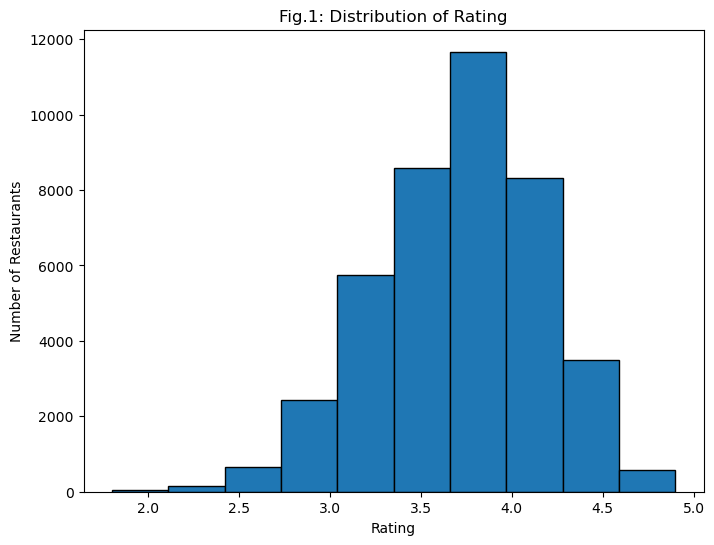

In [16]:
plt.figure(figsize=(8,6))
plt.hist(df['rate'], bins=10, edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.title("Fig.1: Distribution of Rating")
plt.show()

# Cuisines vs Rating

In [17]:
avg_rating_cuisine = (df.groupby('cuisines')['rate'].mean().sort_values(ascending=False))
avg_rating_cuisine.head(10)

cuisines
Continental, North Indian, Italian, South Indian, Finger Food            4.900000
Healthy Food, Salad, Mediterranean                                       4.900000
Asian, Chinese, Thai, Momos                                              4.900000
Continental, North Indian, Chinese, European, BBQ, Finger Food, Asian    4.800000
North Indian, European, Mediterranean, BBQ                               4.800000
Asian, Mediterranean, North Indian, BBQ                                  4.800000
European, Mediterranean, North Indian, BBQ                               4.789474
American, Tex-Mex, Burger, BBQ, Mexican                                  4.750000
Sushi, Japanese, Chinese, Thai                                           4.700000
Chinese, American, Continental, Italian, North Indian                    4.700000
Name: rate, dtype: float64

# Visualization

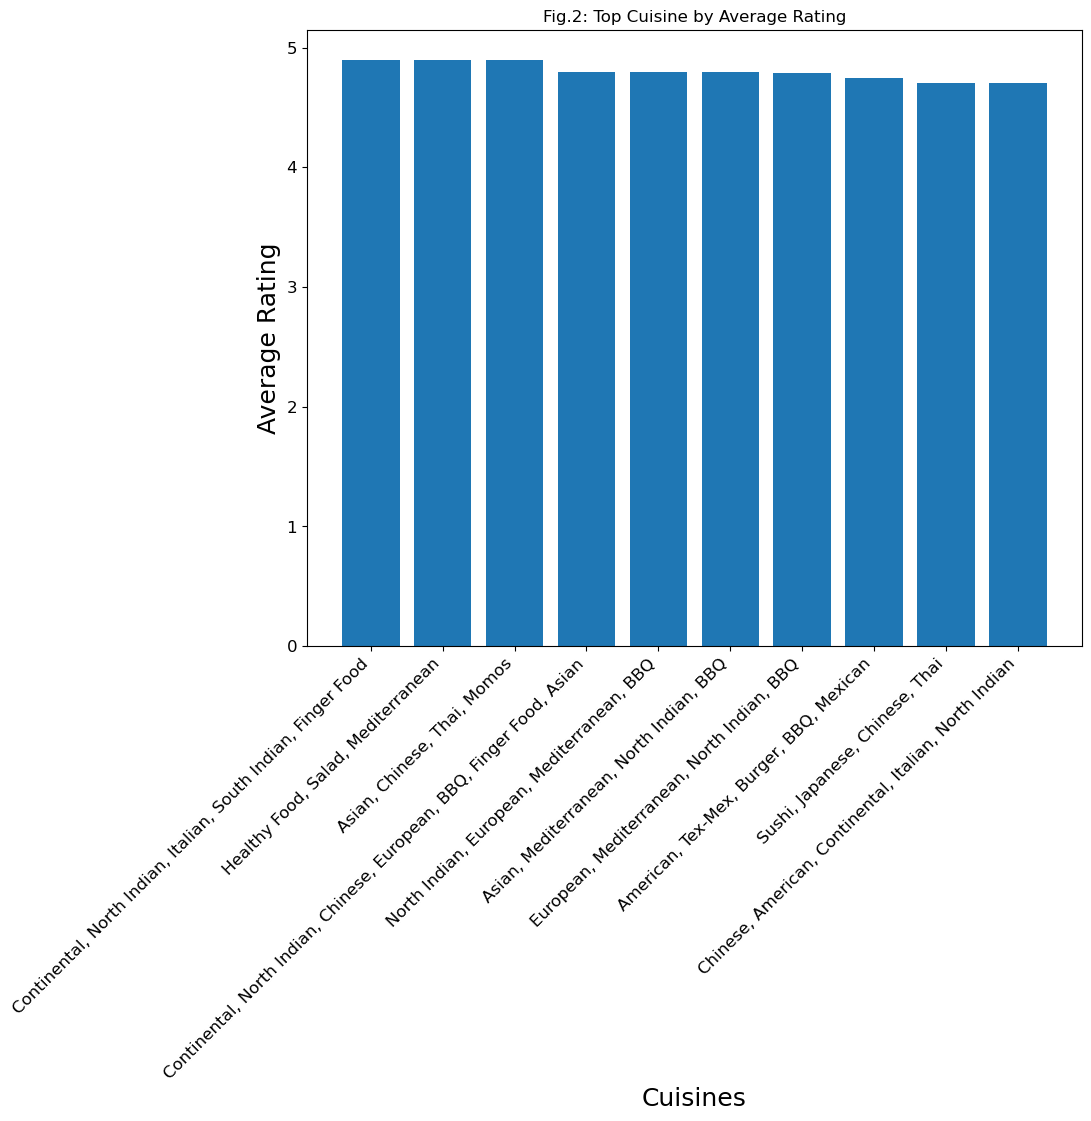

In [18]:
top_cuisine = avg_rating_cuisine.head(10)

plt.figure(figsize=(10,8))
plt.bar(top_cuisine.index, top_cuisine.values)
plt.xlabel("Cuisines",fontsize=18)
plt.ylabel("Average Rating",fontsize=18)
plt.title("Fig.2: Top Cuisine by Average Rating")
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.show()

# Location Preferences Analysis

In [19]:
df['location'].value_counts().head(10)

location
BTM                      5251
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Name: count, dtype: int64

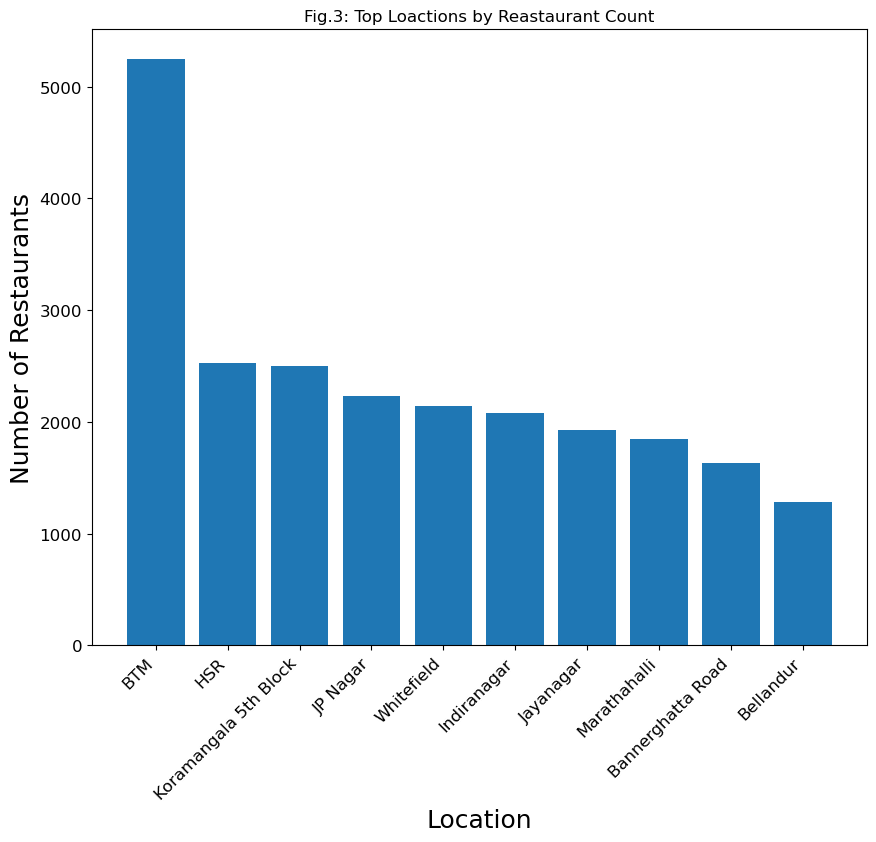

In [20]:
top_location = df['location'].value_counts().head(10)

plt.figure(figsize=(10,8))
plt.bar(top_location.index, top_location.values)
plt.xlabel("Location",fontsize=18)
plt.ylabel("Number of Restaurants",fontsize=18)
plt.title("Fig.3: Top Loactions by Reastaurant Count")
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.show()

# Price vs Rating

In [21]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',','',regex=False)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'],errors='coerce')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [22]:
df_price_rating = df.dropna(subset=['approx_cost(for two people)','rate'])

In [23]:
df.groupby('approx_cost(for two people)')['rate'].mean().head()

approx_cost(for two people)
40.0    3.725
50.0    3.650
60.0      NaN
70.0    3.300
80.0    3.400
Name: rate, dtype: float64

# Visualization

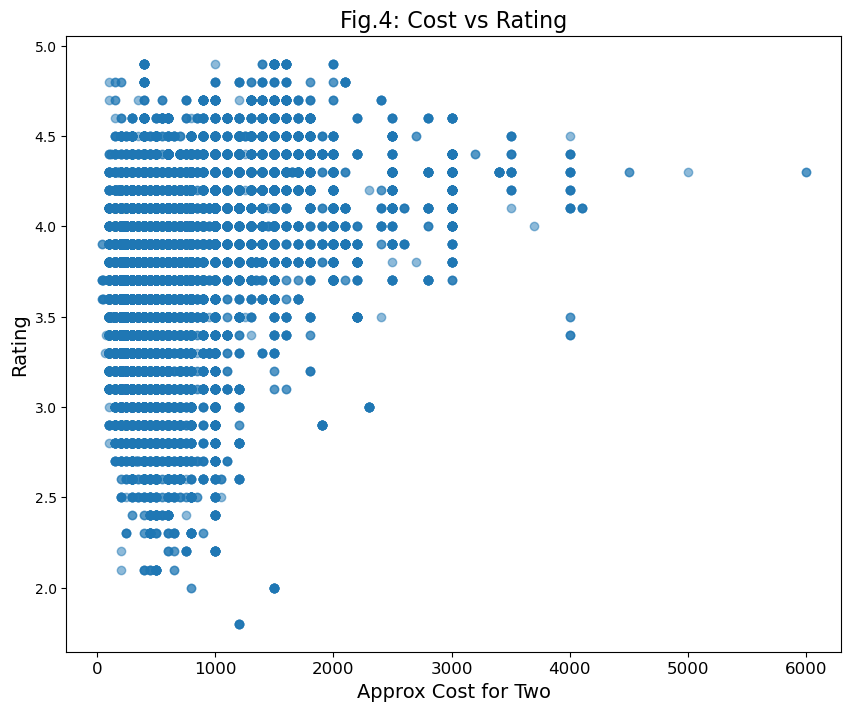

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(df['approx_cost(for two people)'], df['rate'], alpha=0.5)
plt.xlabel("Approx Cost for Two",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Rating",fontsize=14)
plt.xticks(fontsize=12)
plt.title("Fig.4: Cost vs Rating",fontsize=16)
plt.show()

In [25]:
df[['rate', 'votes', 'approx_cost(for two people)']].dtypes

rate                           float64
votes                           object
approx_cost(for two people)    float64
dtype: object

In [26]:
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

In [27]:
df[['rate', 'votes', 'approx_cost(for two people)']].dtypes

rate                           float64
votes                          float64
approx_cost(for two people)    float64
dtype: object

In [28]:
corr_df = df[['rate', 'votes', 'approx_cost(for two people)']].dropna()

In [29]:
corr = corr_df.corr()
corr

,rate,votes,approx_cost(for two people)
rate,1.00000,0.434040,0.383520
votes,0.43404,1.000000,0.365576
approx_cost(for two people),0.38352,0.365576,1.000000


# Heatmap (Feature Relationship)

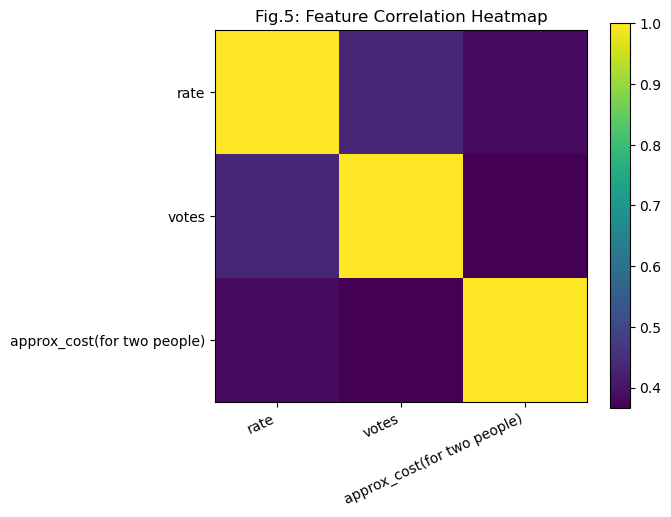

In [30]:
plt.figure(figsize=(6,5))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=25,ha='right')
plt.yticks(range(len(corr)), corr.columns)
plt.title("Fig.5: Feature Correlation Heatmap")
plt.show()

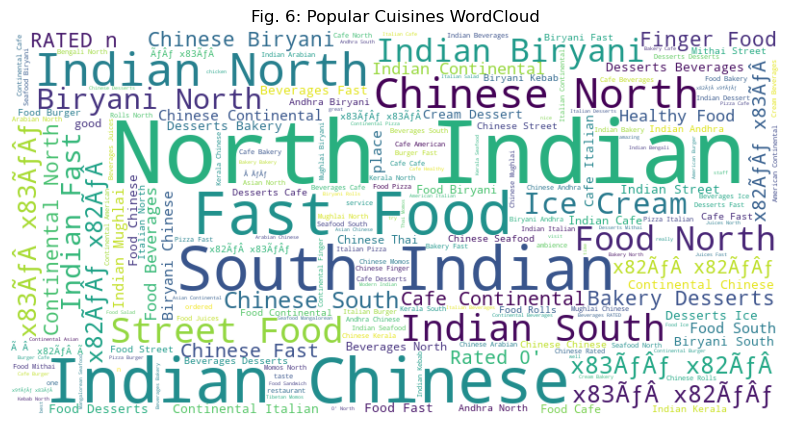

In [31]:
from wordcloud import WordCloud

text = ' '.join(df['cuisines'].dropna().astype(str).str.replace(',',''))

wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Fig. 6: Popular Cuisines WordCloud")
plt.show()